# Project: Predicting Loan Repayment on LendingClub.com

__Goal__: Build a model to help investors on LendingClub.com assess the likelihood of borrowers repaying their loans.

__Data__: Utilize publicly available loan data from LendingClub.com for the period 2007-2010.

__Focus__ This project prioritizes responsible lending practices. We aim to create a model that assists investors in identifying borrowers with a strong repayment history, promoting financial stability for both parties.

__Challenge:__ Classify borrowers based on their loan repayment behavior (paid vs. not paid) using the provided historical data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_csv('28Aug.csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [19]:
data.describe(include='all')

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
unique,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,debt_consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.804970,NaN,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,NaN,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,NaN,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,NaN,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,NaN,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000


In [27]:
data['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

Here as you can see output feature has more samples for category '0' and less for '1'. So there is a requirement of oversampling so that the model don't get bias toward single category. We well oversample the dataset during Train test split.

## Features

### Numerical features

1. int.rate
2. installment
3. log.annual.inc
4. dti (The debt-to-income ratio)
5. fico
6. days.with.cr.lin
7. revol.bal
8. inq.last.6mths
9. delinq.2yrs
10. pub.rec
    
## Categorical data

1. credit.policy
2. purpose
3. not.fully.paid

In [28]:
numeric_features = [
    'int.rate',
    'installment',
    'log.annual.inc',
    'dti',
    'fico',
    'days.with.cr.line',
    'revol.bal',
    'revol.util',
    'inq.last.6mths',
    'delinq.2yrs',
]

categorical_features = [
    'credit.policy',
    'purpose',
    'pub.rec'
]

## Let us plot all numerical values

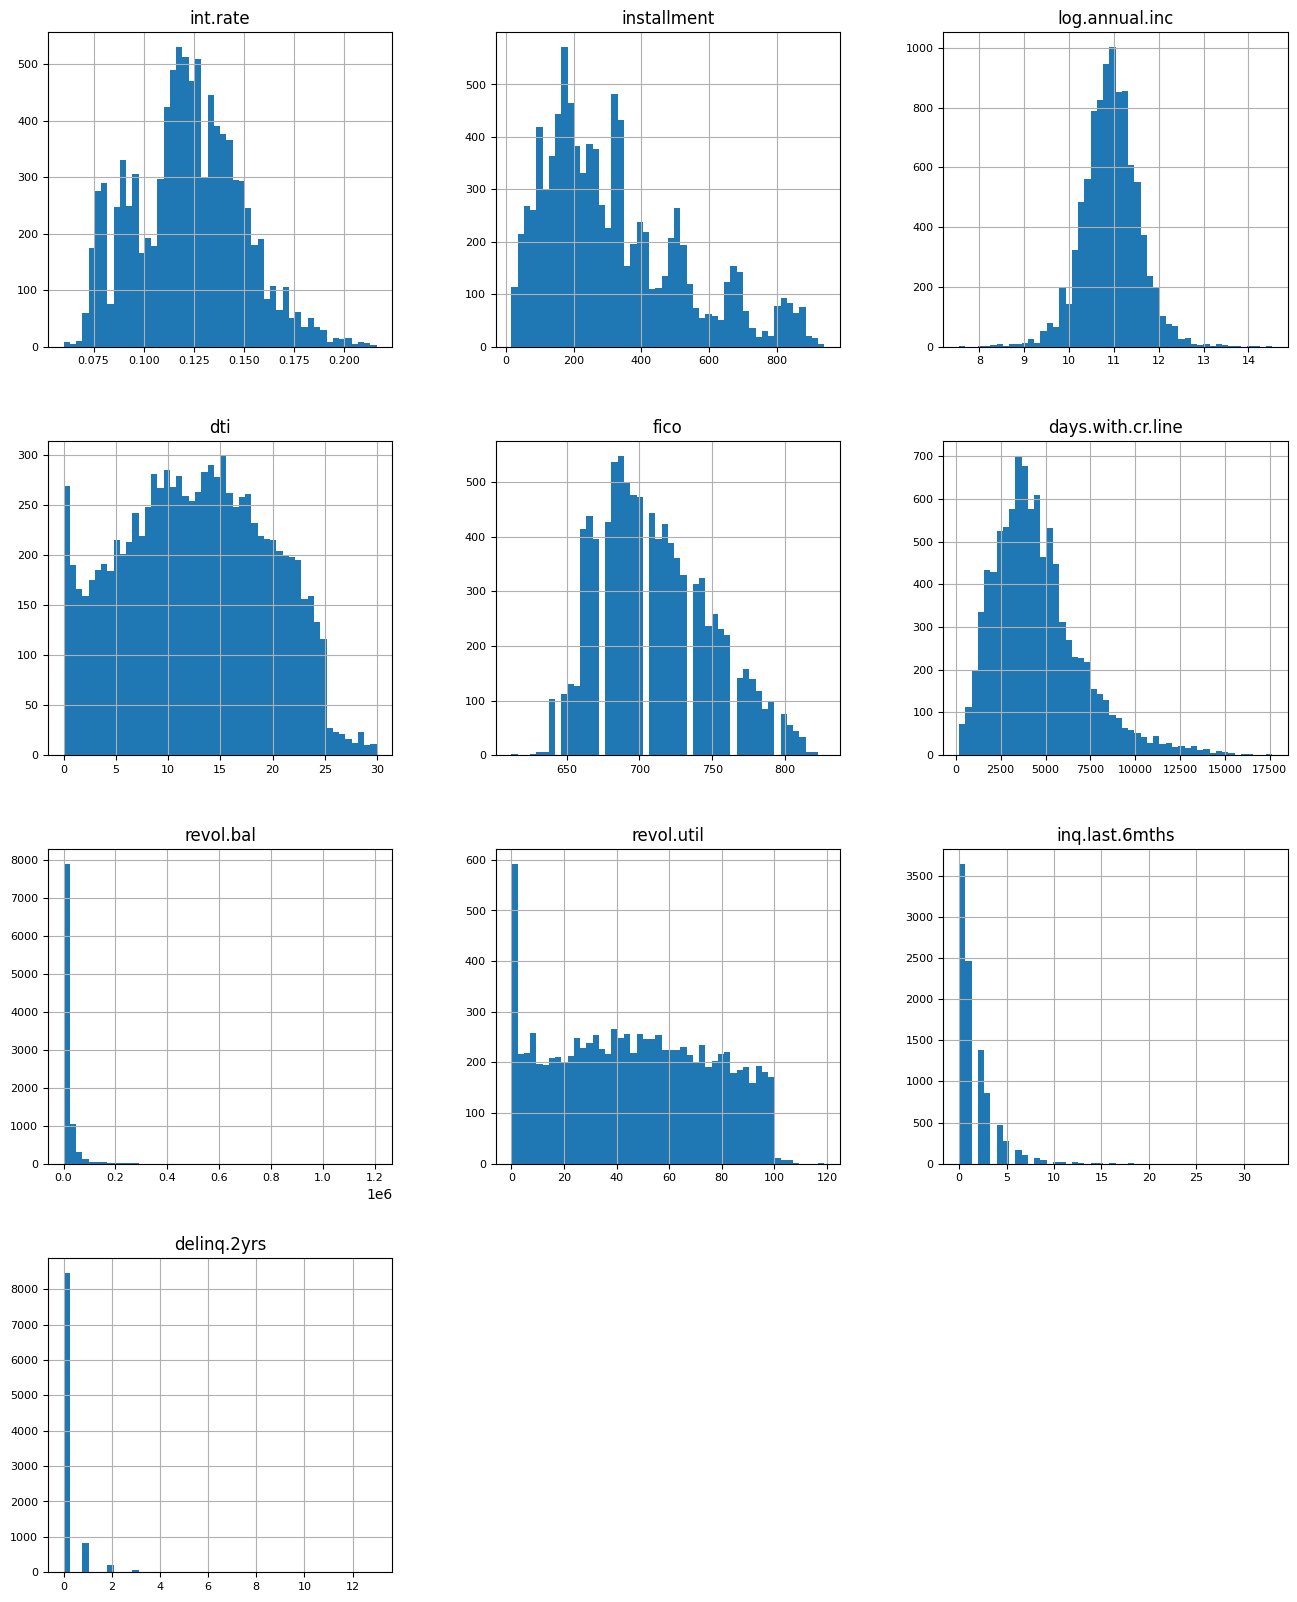

In [22]:
numeric_data = data[numeric_features]
numeric_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## Testing the corelation between the features and output

### 1. Numeric features corelation with categorical output feature

Since output features is categorical, we need to use __Point-biserial correlation__

In [37]:
from scipy.stats import pointbiserialr
for feature in numeric_features:
    statisitcs, p_value = pointbiserialr(data['not.fully.paid'], data[feature])
    print(f"feature: {feature}\t\t Significance: {statisitcs:.5f} p-value: {p_value: .5f}")
    print("-"*100)

feature: int.rate		 Significance: 0.15955 p-value:  0.00000
----------------------------------------------------------------------------------------------------
feature: installment		 Significance: 0.04996 p-value:  0.00000
----------------------------------------------------------------------------------------------------
feature: log.annual.inc		 Significance: -0.03344 p-value:  0.00106
----------------------------------------------------------------------------------------------------
feature: dti		 Significance: 0.03736 p-value:  0.00025
----------------------------------------------------------------------------------------------------
feature: fico		 Significance: -0.14967 p-value:  0.00000
----------------------------------------------------------------------------------------------------
feature: days.with.cr.line		 Significance: -0.02924 p-value:  0.00422
----------------------------------------------------------------------------------------------------
feature: revol.bal		 S

<Figure size 1100x700 with 0 Axes>

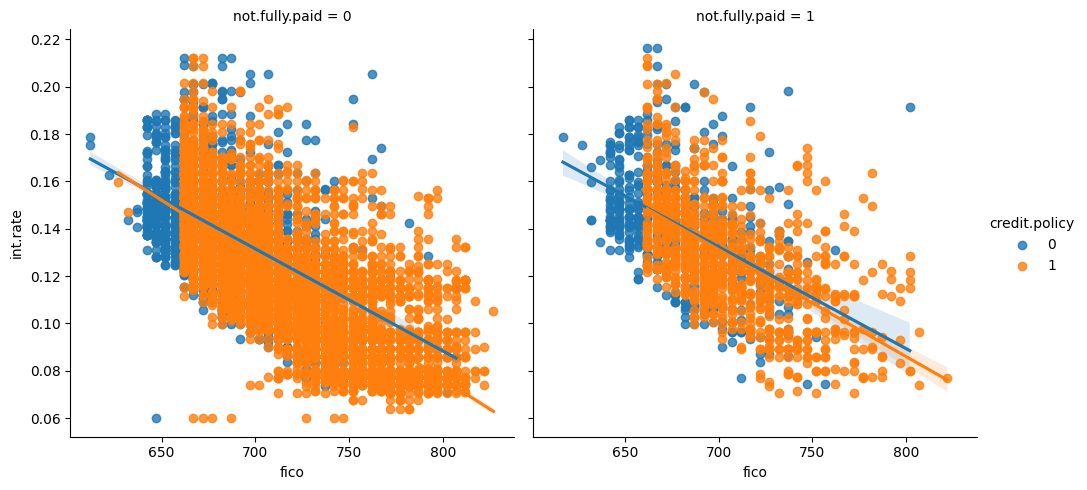

In [25]:
plt.figure(figsize=(11, 7))
sns.lmplot(y='int.rate', x='fico', data= data, hue='credit.policy', col='not.fully.paid')

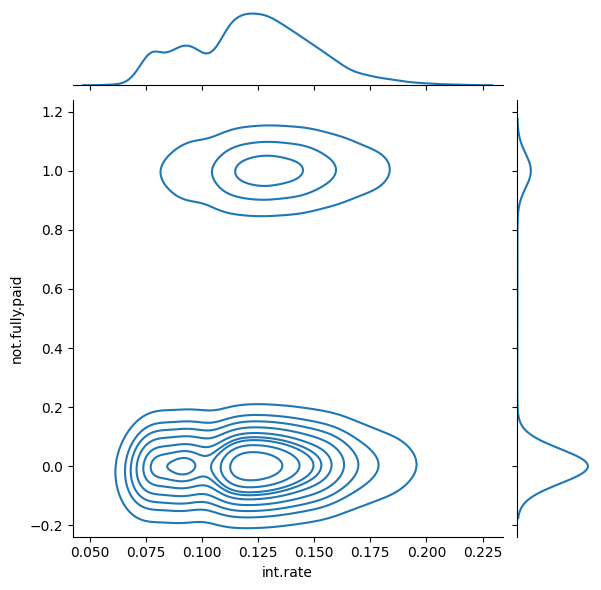

In [38]:
sns.jointplot(x='int.rate', y='not.fully.paid', data=data, kind='kde')

Based on corelation test all numeric feature are little corelated with target feature(debth not paid or paid). Let us plot to learn more information about the data.

### 2. Comparing corelation between categorical featres
We well use here chi test

In [39]:
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

for feature in categorical_features:
    contingency_table = pd.crosstab(data['not.fully.paid'], data[feature])
    chi, p, dof, expected = chi2_contingency(contingency_table)

    print(f"feature: {feature}\t chi: {chi}, p-value: {p}")
    print("-"*100)

feature: credit.policy	 chi: 238.3788010698609, p-value: 8.87573133930704e-54
----------------------------------------------------------------------------------------------------
feature: purpose	 chi: 96.9846958906326, p-value: 1.0672453117980497e-18
----------------------------------------------------------------------------------------------------
feature: pub.rec	 chi: 39.56110774714441, p-value: 1.830777027585089e-07
----------------------------------------------------------------------------------------------------


<Axes: xlabel='purpose', ylabel='count'>

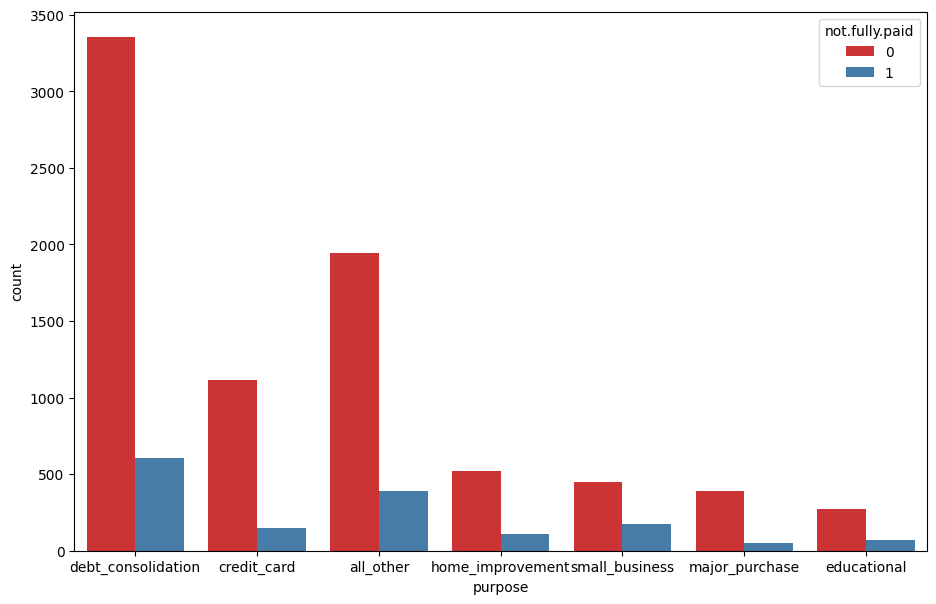

In [31]:
plt.figure(figsize=(11, 7))
sns.countplot(x='purpose', hue='not.fully.paid', data=data, palette='Set1')

Based on the Chi test it feels like the features are fairly corelated with the target feature

### Conclusion

All give feature are little or more but related to the target feature i.e. do customer not repay the depth(1) or repay(0)

## Model selection

The relation between input feature and output labels is weak, so here we can't use logistic regression and SVM which requires strong relation between input feature and output labels.

Random forest look may work well for such senariou where relation is weak or non-linear.

## Preprocessing and Training model

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_pipeline = Pipeline(
    steps=[('encoder', StandardScaler())]
)

categorical_pipeline = Pipeline(
    steps=[('encoder', OneHotEncoder())]
)

In [30]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    transformers=[
        ('numeric', numeric_pipeline, numeric_features), 
        ('categorical', categorical_pipeline, categorical_features)
    ]
)

In [80]:
from sklearn.ensemble import RandomForestClassifier

model = Pipeline(
    steps=[
        ('preprocessing', preprocessing),
        ('model', RandomForestClassifier(100, max_depth=8, max_features=5, min_samples_leaf=1,random_state=1234))
    ]
)
model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('encoder',
                                                                   StandardScaler())]),
                                                  ['int.rate', 'installment',
                                                   'log.annual.inc', 'dti',
                                                   'fico', 'days.with.cr.line',
                                                   'revol.bal', 'revol.util',
                                                   'inq.last.6mths',
                                                   'delinq.2yrs']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['credit.policy', 'purpose',
                                                   'pub.rec'])])),
                ('model',
                 RandomForestClassifier(max_depth=8, max_features=5,
                                        random_state=1234))])

In [70]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

X = data[numeric_features + categorical_features]
y = data.iloc[:, -1]

# oversampling
X_oversampled, y_oversampled = RandomOverSampler(random_state=0).fit_resample(X, y)

X_train, X_temp, y_train, y_temp = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=10)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10)

print(f"X_oversampled: {X_oversampled.shape} y_oversampled: {y_oversampled.shape}")
print('-'*35, 'Train test split after oversampling', '-'*35)
print(f"X_train: {X_train.shape} y_train: {y_train.shape}")
print(f"X_cross_validation: {X_cv.shape} y_cross_validation: {y_cv.shape}")
print(f"X_test: {X_test.shape} y_test: {y_test.shape}")

X_oversampled: (16090, 13) y_oversampled: (16090,)
----------------------------------- Train test split after oversampling -----------------------------------
X_train: (12872, 13) y_train: (12872,)
X_cross_validation: (1609, 13) y_cross_validation: (1609,)
X_test: (1609, 13) y_test: (1609,)


### Train accuracy

In [81]:
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.7367930391547545

### Cross validation Accuracy

In [82]:
model.score(X_cv, y_cv)

0.6892479801118707

### Test Accuracy

In [83]:
model.score(X_test, y_test)

0.6929770043505282

# Model Analysis

### Classification report

In [84]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70       806
           1       0.71      0.66      0.68       803

    accuracy                           0.69      1609
   macro avg       0.69      0.69      0.69      1609
weighted avg       0.69      0.69      0.69      1609



### Confusion matrix

In [88]:
Positive, Negative = confusion_matrix(y_test, y_pred, normalize='all')

print("\t Positive\tNegative")
print(f"Positive {Positive[0]:.2f}\t\t{Positive[1]:.2f}")
print(f"Negative {Negative[0]:.2f}\t\t{Negative[1]:.2f}")

	 Positive	Negative
Positive 0.36		0.14
Negative 0.17		0.33
